In [1]:
cx36_mut = {
    'hetero': {
        'mut_type':
            [
                'K238A', # L -3-2=-5
                'E239K;E230K,E239K', # N 0+2=2
                'K238E,E239K', # O 0+0=0
                'E230K;E230K,E239K', # Q 0+2=2
                'E241A;E230K,E239K', # P -1+2=1
                'K238E,E230K', # R -2-2=-4
                'E230K,E239K', # D 2-2 = 0
                'E230K', # B 0-2 =-2
                'E239K', # C -2
                'E230K,E239K;K238E,E230K', # E 2-2 = 0
                'E230K;K238E', # F 0-4 = -4
                'E239K;K238E', # G 0-4 = -4
                'K238Q', # M -3 - 2 = -5
                'E239K;E230K,E239K', # N 0+2=2
                'K238E;K238E,E230K', # V -4 -2 = -6
                'K238E;K238E,E239K', # W -4 -2 = -6
                'K238E;E230K,E239K,E241K', # a -4 + 4 = 0
                'K238E;E241K', #b -4 + 0 = -4
            ],
        'label': ['L', 'N', 'O', 'Q', 'P', 'R', 'D' ,'B', 'C', 'E', 'F', 'G', 'M', 'N', 'V', 'W', 'a', 'b'],
        'ESIs': [3, 3, 3, 3, 3, 2, 4, 5, 5, 4, 4, 4, 3, 3, 1, 1, 2, 2],
        'net_charge' :[-5, 2, 0, 2, 1, -4, 0, -2, -2, 0, -4, -4, -5, 2, -6, -6, 0, -4],
        'Functional': [True, True, True, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False]
    },
    
    'homo': {
        'mut_type':
            [
                'E241A;E241A', # J -1*2 = -2
                'E239K;E239K', # I 0*2 = 0
                'E230K;E230K', # H 0*2 = 0
                'K238E,E230K,E239K;K238E,E230K,E239K', # K -2*2 = -4
                'E230K,E239K;E230K,E239K', # S 2*2=4
                'K238E,E230K;K238E,E230K', # T -2*2 = -4
                'K238E,E239K;K238E,E239K', # U -2*2 = -4
                'K238Q;K238Q', # Z -3*2 = -6
                'K238A;K238A', # X -3*2 = -6
                'K238E;K238E', # Y -4*2 = -8
                'E241K;E241K', # c 0*2 = 0
                'E241K,E239K,E230K;E241K,E239K,E230K', # d 2*4 = 8
                'E241K,E239K,E230K,K238E;E241K,E239K,E230K,K238E', # e 2*2 = 4
            ],
        'label': ['J', 'I', 'H', 'K','S', 'T', 'U', 'Z', 'X', 'Y', 'c', 'd', 'e'],
        'ESIs': [4, 4, 4, 4, 2, 2, 2, 0, 0, 0, 4, 0, 6],
        'net_charge' : [-2, 0, 0, -4, 4, -4, -4, -6, -6, -8, 0, 8, 4],
        'Functional': [True, True, True, True, False, False, False, False, False, False, False, False, False]
    }
}
stru = ['8xgd','8iyg']
for key in cx36_mut:
    for ter in cx36_mut[key]:
        print(key, ter, len(cx36_mut[key][ter]))

hetero mut_type 18
hetero label 18
hetero ESIs 18
hetero net_charge 18
hetero Functional 18
homo mut_type 13
homo label 13
homo ESIs 13
homo net_charge 13
homo Functional 13


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
def pval_to_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

# Dataset Combine for difference to WT

In [3]:
pdb =  '8xgd' # '8xgd','8iyg'
#pdb = '8iyg'
file = 'Dif' #Average, Dif, Raw

In [ ]:
all_diff_df = []
use_e241k = True
for mut_sym in ['hetero', 'homo']:
    fdx_df = pd.read_csv(f'./{pdb}_{mut_sym}/{file}_{pdb}.fxout', sep='\t', skiprows=8)
    e241k_mut_df = pd.read_csv(f'./{pdb}_{mut_sym}/{file}_{pdb}_e241k.fxout', sep='\t', skiprows=8)
    #drop_cols
    drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
                'electrostatic kon', 'helix dipole', 'Sidechain Hbond'] #'Backbone Hbond', ,'Solvation Hydrophobic', 'energy Ionisation'
    fdx_df = fdx_df.drop(drop_cols, axis=1)
    e241k_mut_df = e241k_mut_df.drop(drop_cols, axis=1)
    
    drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
    fdx_df = fdx_df.drop(drop_cols, axis=1)
    e241k_mut_df = e241k_mut_df.drop(drop_cols, axis=1)
    if use_e241k:
        fdx_df = pd.concat([fdx_df, e241k_mut_df], ignore_index=True)

    fdx_df['label'] = [lb for lb in cx36_mut[mut_sym]['label'] for i in range(10)]
    fdx_df['ESI'] = [esi for esi in cx36_mut[mut_sym]['ESIs'] for i in range(10)]
    fdx_df['net_charge'] = [nc for nc in cx36_mut[mut_sym]['net_charge'] for i in range(10)]
    fdx_df['mut'] = [mt for mt in cx36_mut[mut_sym]['mut_type'] for i in range(10)]
    fdx_df['mut_type'] = [mut_sym for i in range(len(fdx_df))]
    fdx_df['functional'] = [fn for fn in cx36_mut[mut_sym]['Functional'] for i in range(10)]
    
    drop_cols = ['Pdb']
    fdx_df = fdx_df.drop(drop_cols, axis=1)
    all_diff_df.append(fdx_df)
all_diff_df = pd.concat(all_diff_df, ignore_index=True)

In [5]:
all_diff_df

,total energy,Backbone Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,entropy sidechain,entropy mainchain,label,ESI,net_charge,mut,mut_type,functional
0,12.5418,8.442980e-02,3.871740,4.50434,-8.05993,4.951320,-3.341950,7.84029,L,3,-5,K238A,hetero,True
1,13.3848,3.682550e-02,1.250950,2.59757,-2.03405,1.689380,-0.636498,8.83991,L,3,-5,K238A,hetero,True
2,13.2530,-4.547470e-13,1.380160,3.11532,-3.24897,1.594440,-1.036950,8.42796,L,3,-5,K238A,hetero,True
3,12.9413,6.103070e-02,2.531250,3.34955,-5.08246,2.945350,-2.919940,8.54356,L,3,-5,K238A,hetero,True
4,12.4231,4.547470e-13,1.858650,2.88168,-3.77223,2.328520,-1.525460,7.96013,L,3,-5,K238A,hetero,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,14.7801,-3.329610e+00,2.950410,5.76968,-14.84460,-0.604134,-8.727510,3.97428,e,6,4,"E241K,E239K,E230K,K238E;E241K,E239K,E230K,K238E",homo,False
306,13.8930,-4.311900e+00,2.331160,6.21617,-13.15460,-1.048090,-7.233760,4.35225,e,6,4,"E241K,E239K,E230K,K238E;E241K,E239K,E230K,K238E",homo,False
307,15.0555,-3.732130e+00,0.421884,6.01811,-10.86110,-4.129180,-6.645220,5.44578,e,6,4,"E241K,E239K,E230K,K238E;E241K,E239K,E230K,K238E",homo,False
308,10.3769,-5.121980e+00,1.791540,6.31483,-14.98550,-2.667610,-4.264060,6.18093,e,6,4,"E241K,E239K,E230K,K238E;E241K,E239K,E230K,K238E",homo,False


## Direct statitics

In [12]:
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.stats import mannwhitneyu

### All pairs

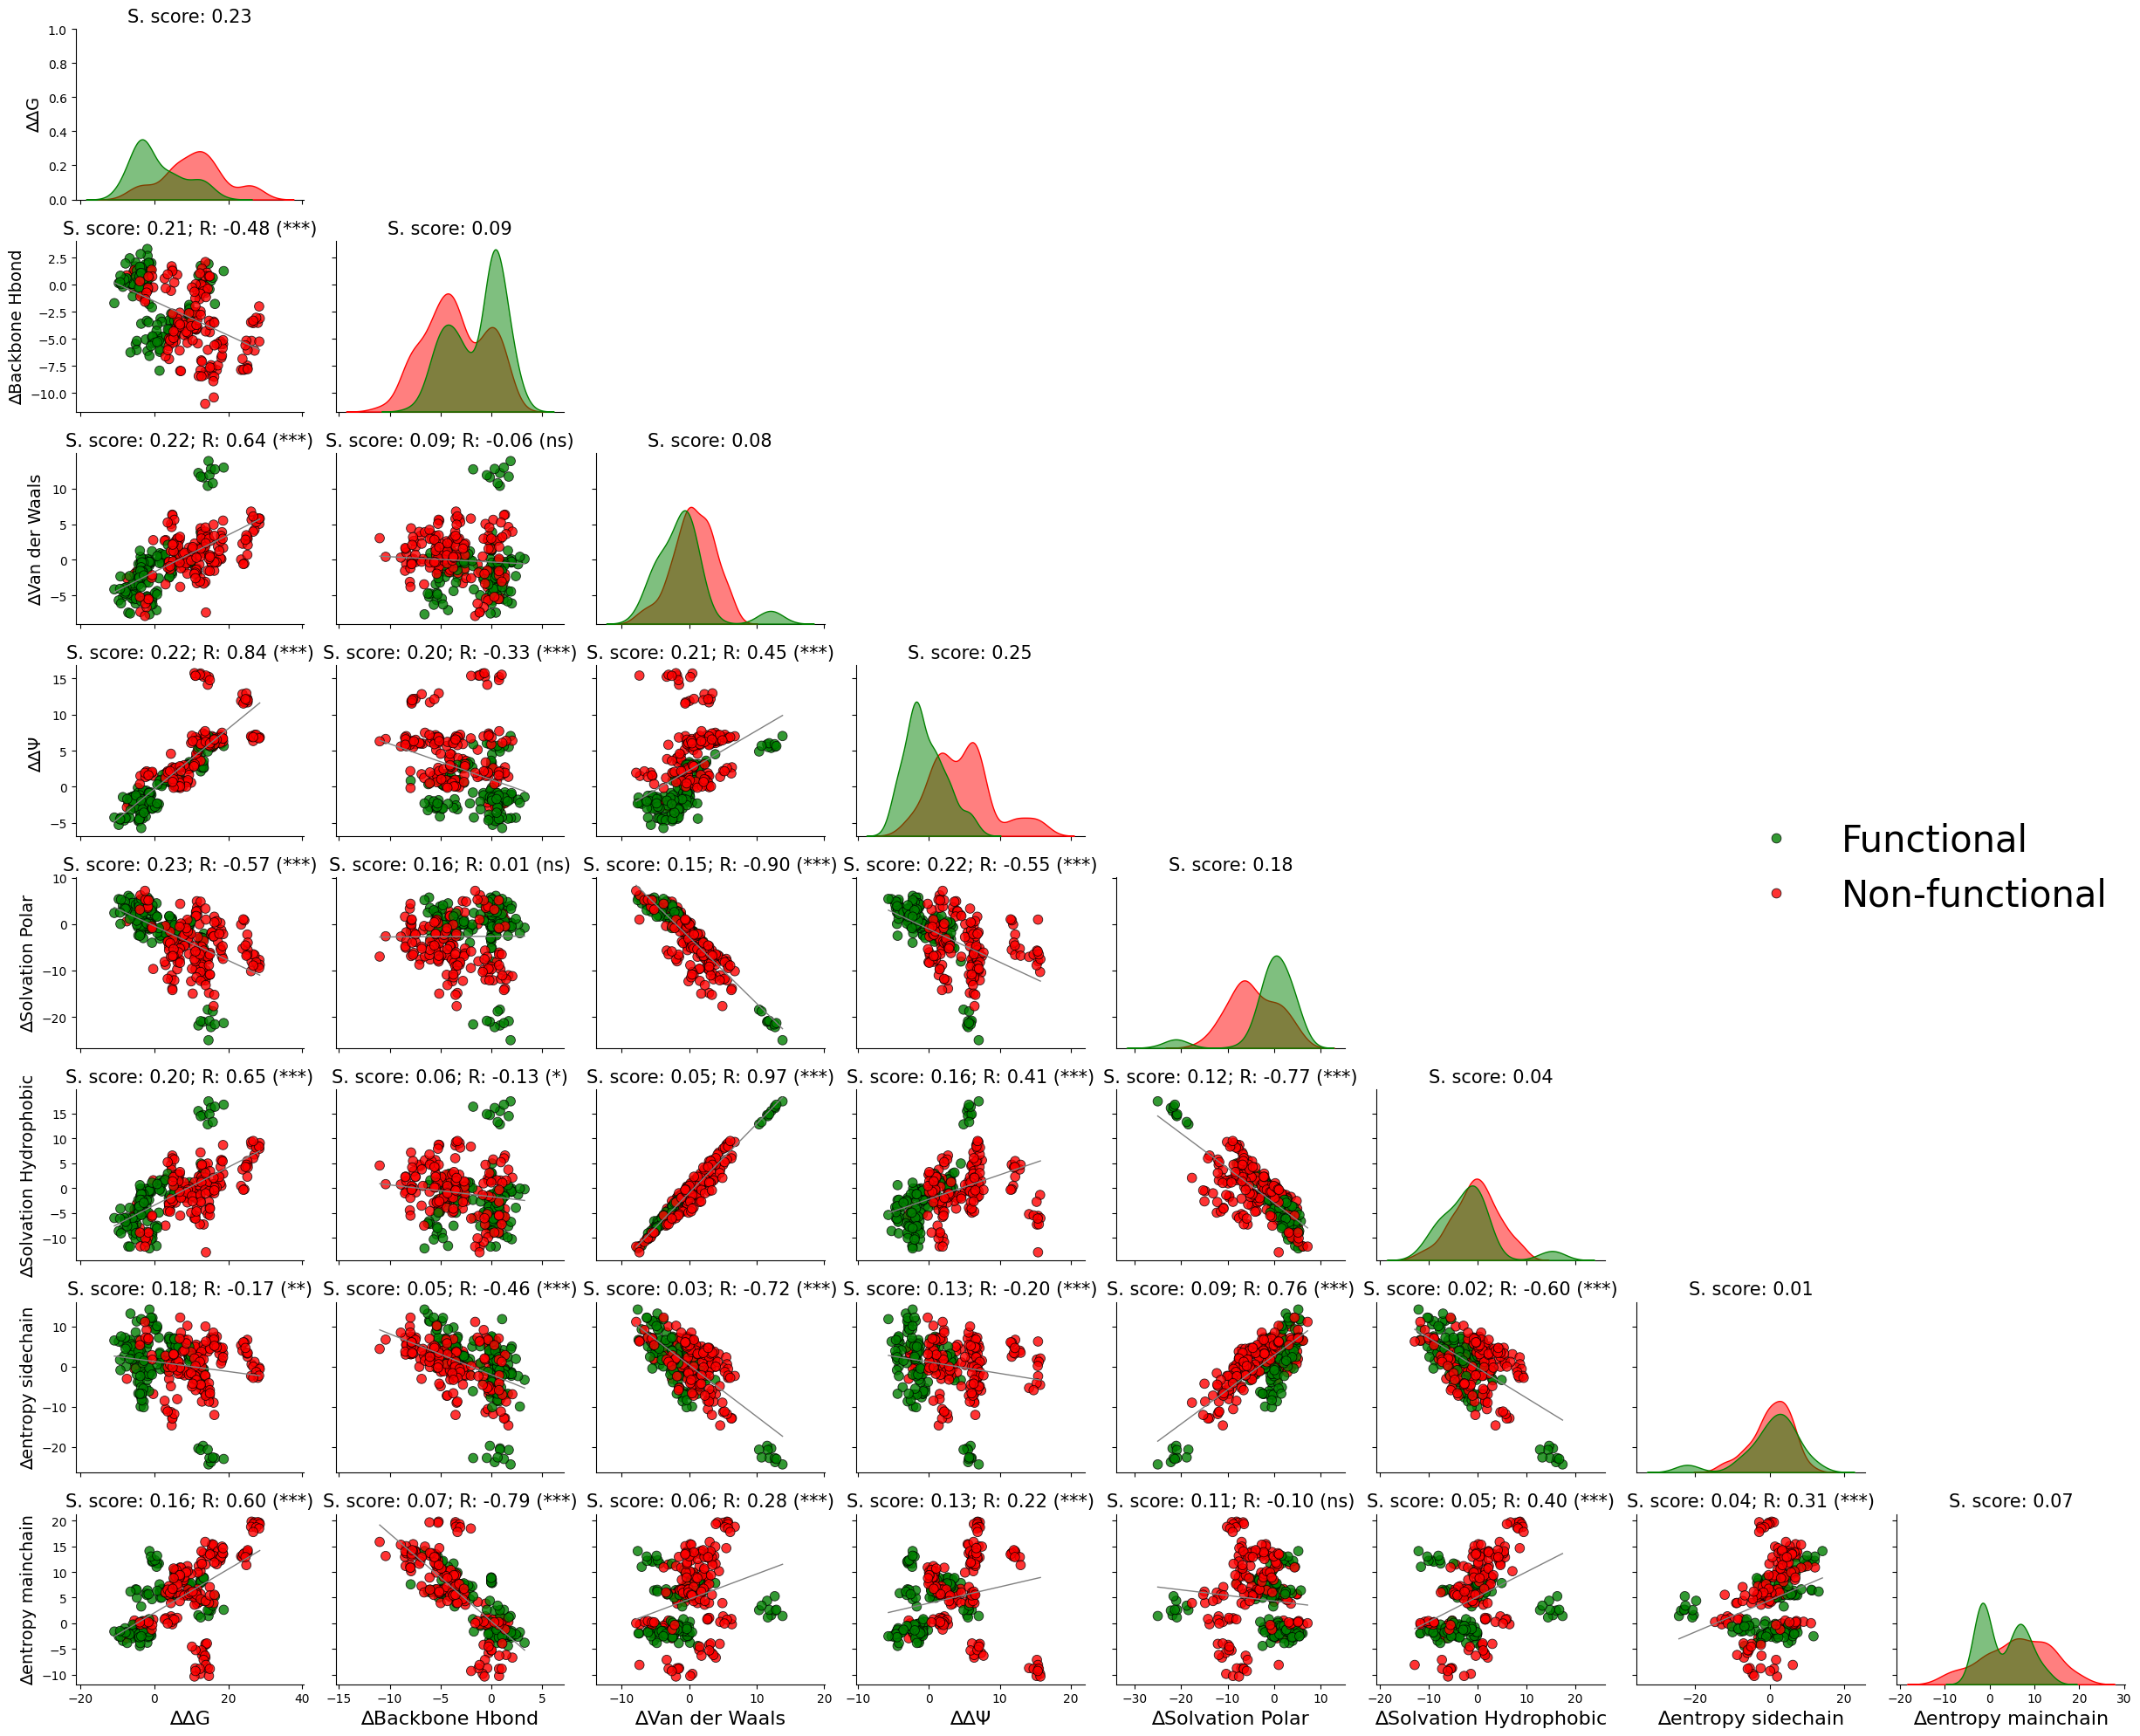

In [13]:
# Prepare data
all_diff_df['functional_label'] = all_diff_df['functional'].map({True: 'Functional', False: 'Non-functional'})
feature_cols = [col for col in all_diff_df.columns if all_diff_df[col].dtype != 'O' and col not in\
    ['functional', 'ESI','functional_label', 'mut','mut_type', 'label', 'net_charge']]
labels = all_diff_df['functional_label']

font_label = 18

# Create PairGrid
g = sns.PairGrid(
        all_diff_df,
        vars=feature_cols,
        hue='functional_label',
        palette={'Functional': 'green', 'Non-functional': 'red'},
        )

# Map scatter plots
g.map_lower(sns.scatterplot, edgecolor='k', s=60, alpha=0.8)
g.map_diag(sns.kdeplot, fill=True, alpha=0.5)  # KDE on diagonal, like pairplot
# Compute and annotate silhouette scores
for i, x_var in enumerate(feature_cols):
    for j, y_var in enumerate(feature_cols):
        if j > i:  # Upper triangle (blank by default)
            g.axes[i, j].set_axis_off()
        if j < i:
            ax = g.axes[i, j]
            X = all_diff_df[[y_var, x_var]].values  # Note: y_var first for rows, x_var for columns

            score = silhouette_score(X, labels)
            # Linear regression on all data
            slope, intercept, r_val, p_val, _ = linregress(X[:,0], X[:,1])
            # Plot the regression line
            x_fit = pd.Series(sorted(X[:,0]))
            y_fit = slope * x_fit + intercept
            ax.plot(x_fit, y_fit, color='grey', linestyle='-', linewidth=1)
            ax.set_title(f"S. score: {score:.2f}; R: {r_val:.2f} ({pval_to_stars(p_val)})", fontsize=font_label-3)
            
        if j == i:
            ax = g.axes[i, j]
            # Compute silhouette score for the diagonal (self-comparison)
            X = all_diff_df[[x_var]].values
            score = silhouette_score(X, labels)
            # Compute p-value (Mann-Whitney U test, non-parametric) for Non-functional vs Functional
            #elec_func = all_diff_df[all_diff_df['functional']==True][x_var]
            #elec_nonfunc = all_diff_df[all_diff_df['functional']==False][x_var]
            #stat, pval = mannwhitneyu(elec_func, elec_nonfunc, alternative='two-sided')
            ax.set_title(f"S. score: {score:.2f}", fontsize=font_label-3)
            


g.add_legend(fontsize=30)
g._legend.set_title("")  # Access the legend directly from the PairGrid
#plt.suptitle("Pairwise Scatter Plots with Silhouette Scores", y=1.02, fontsize=30)

for i, feature in enumerate(feature_cols):
    if feature == 'total energy':
        # Set y-label for the first feature
        g.axes[i, 0].set_ylabel('∆∆G', fontsize=font_label-4)
        # Set x-label for the first feature
        g.axes[-1, i].set_xlabel('∆∆G', fontsize=font_label-2)
    elif feature == 'Electrostatics':
        # Set y-labels for the first column (leftmost)
        g.axes[i, 0].set_ylabel('∆∆Ψ ', fontsize=font_label-4)
        # Set x-labels for the bottom row
        g.axes[-1, i].set_xlabel('∆∆Ψ', fontsize=font_label-2)
    else:
        # Set y-labels for the first column (leftmost)
        g.axes[i, 0].set_ylabel(f'∆{feature}', fontsize=font_label-4)
        # Set x-labels for the bottom row
        g.axes[-1, i].set_xlabel(f'∆{feature}', fontsize=font_label-2)


plt.tight_layout()
plt.savefig(f"{pdb}_Pairwise_Plots.svg", format="svg")

### Single figure of a quantity vs ∆∆G

In [6]:
all_diff_df_reduced = all_diff_df[~all_diff_df['mut'].isin(['E241A;E241A', 'E241K,E239K,E230K;E241K,E239K,E230K'])]

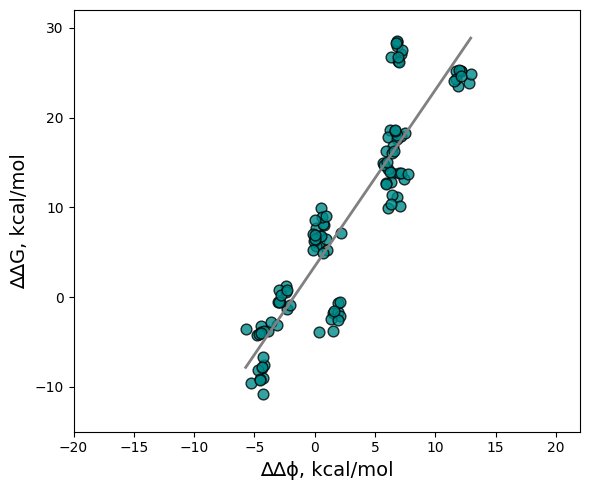

In [19]:
from scipy.stats import linregress

# Prepare data
X = all_diff_df_reduced[all_diff_df_reduced['mut_type']=='homo'][['Electrostatics', 'total energy']].values
x = X[:, 0]  # Electrostatics
y = X[:, 1]  # Total Energy

# Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(x, y, color='darkcyan', edgecolor='k', s=60, alpha=0.8)

# Linear fit
slope, intercept, r_val, p_val, _ = linregress(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='Grey', linestyle='-', linewidth=2, label='Linear fit')

# Annotation
stats_text = f"Rp = {r_val:.2f} ({pval_to_stars(p_val)})"


# Labels and formatting
plt.xlabel('∆∆ϕ, kcal/mol', fontsize=14)
plt.ylabel('∆∆G, kcal/mol', fontsize=14)
plt.ylim(-15, 32)
plt.xlim(-20, 22)
ax = plt.gca()
#ax.tick_params(labelbottom=False, labelleft=False)


plt.tight_layout()

#plt.savefig(f"{pdb}_∆E_vs_∆∆G.svg", format="svg")

In [25]:
r_val, p_val

(np.float64(0.9006075108008692), np.float64(7.01547308289082e-41))

### Multiple quantities vs ∆∆G

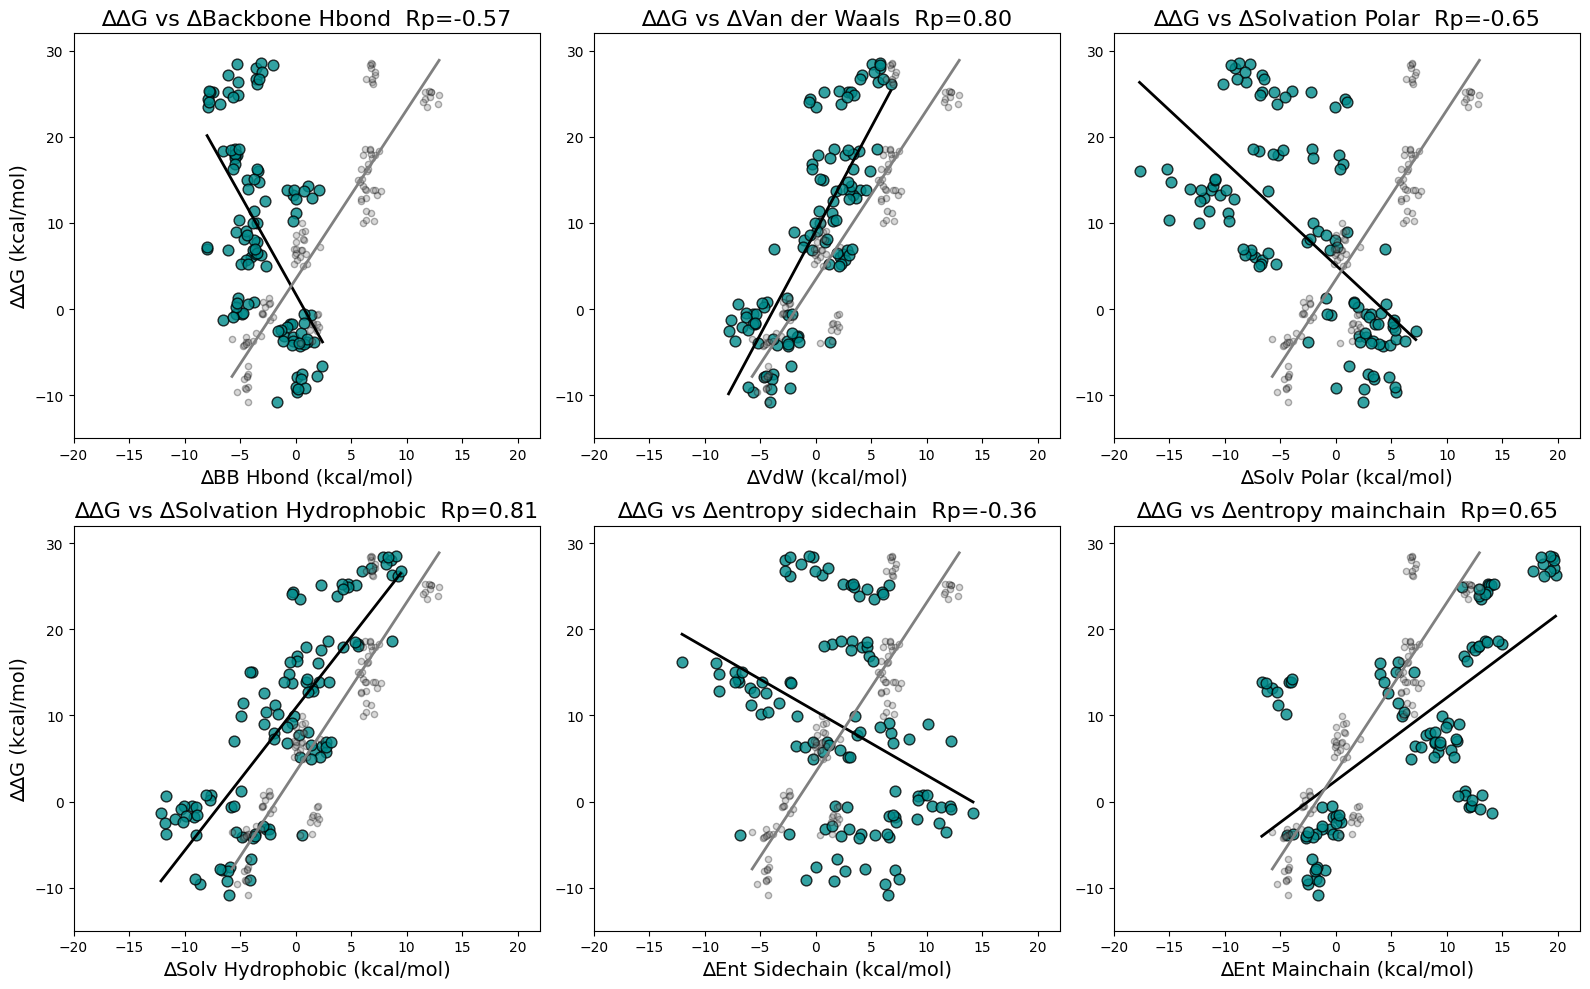

In [8]:
from scipy.stats import linregress
# Scatter plot
fig, axes = plt.subplots(figsize=(16, 10), ncols=3, nrows=2)
axes = axes.flatten()
ener_terms = ['Backbone Hbond', 'Van der Waals', 'Solvation Polar', 'Solvation Hydrophobic', 'entropy sidechain', 'entropy mainchain']
ener_term_short = ['BB Hbond', 'VdW', 'Solv Polar', 'Solv Hydrophobic', 'Ent Sidechain', 'Ent Mainchain']

# Prepare elestrostaics data
X_e = all_diff_df_reduced[all_diff_df_reduced['mut_type']=='homo'][['Electrostatics', 'total energy']].values
x_e = X_e[:, 0]  # Electrostatics
y_e = X_e[:, 1]  # Total Energy

# Scatter plot
#plt.figure(figsize=(6, 5))
#plt.scatter(x, y, color='darkcyan', edgecolor='k', s=60, alpha=0.8)

# Linear fit
slope_e, intercept_e, r_val_e, p_val_e, _ = linregress(x_e, y_e)
x_e_fit = np.linspace(x_e.min(), x_e.max(), 100)
y_e_fit = slope_e * x_e_fit + intercept_e

for i, ax in enumerate(axes):
    # Prepare data
    X = all_diff_df_reduced[all_diff_df_reduced['mut_type']=='homo'][[ener_terms[i], 'total energy']].values
    x = X[:, 0]
    y = X[:, 1]
    ax.scatter(x, y, color='darkcyan', edgecolor='k', s=60, alpha=0.8)
    ax.scatter(x_e, y_e, color='Grey', edgecolor='k', s=20, alpha=0.3)

    # Linear fit
    slope, intercept, r_val, p_val, _ = linregress(x, y)
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = slope * x_fit + intercept
    ax.plot(x_fit, y_fit, color='k', linestyle='-', linewidth=2, label='Linear fit')
    ax.plot(x_e_fit, y_e_fit, color='Grey', linestyle='-', linewidth=2, label='Linear fit (Electrostatics)')
    
    ax.set_xlabel('∆'+ener_term_short[i]+' (kcal/mol)', fontsize=14)
    ax.set_ylim(-15, 32)
    ax.set_xlim(-20, 22)
    if i == 0 or i == 3:
        ax.set_ylabel('∆∆G (kcal/mol)', fontsize=14)

    # Annotation
    stats_text = f"Rp={r_val:.2f}"

    ax.set_title('∆∆G vs ∆'+ener_terms[i]+'  '+stats_text, fontsize=16)

plt.tight_layout()
plt.savefig(f"{pdb}_∆E_vs_other_SI.svg", format="svg")

### ∆phi distribution

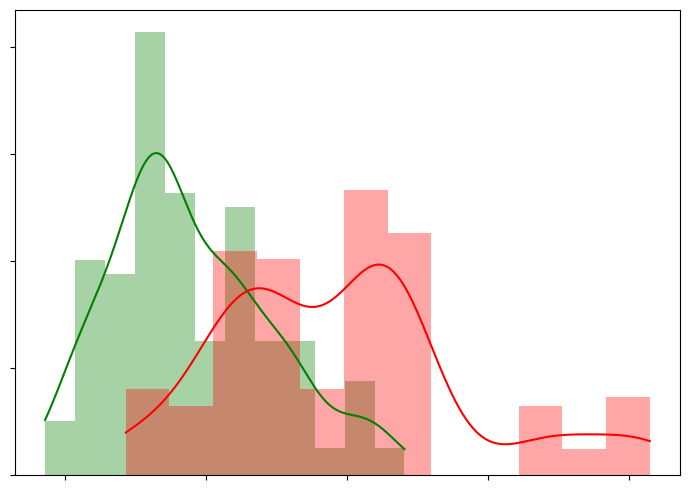

In [57]:
import seaborn as sns
from scipy.stats import mannwhitneyu

# Prepare data
df = all_diff_df.copy()
df['functional_label'] = df['functional'].map({True: 'Functional', False: 'Non-functional'})

# Extract values
elec_func = df[df['functional_label'] == 'Functional']['Electrostatics']
elec_nonfunc = df[df['functional_label'] == 'Non-functional']['Electrostatics']

# Compute p-value (Mann-Whitney U test, non-parametric)
stat, pval = mannwhitneyu(elec_func, elec_nonfunc, alternative='two-sided')

# Plot
plt.figure(figsize=(7, 5))
sns.histplot(elec_func, color='g', label='Functional', kde=True, stat='density',
             bins=12, alpha=0.35, edgecolor=None, kde_kws={'bw_adjust': 1})
sns.histplot(elec_nonfunc, color='r', label='Non-functional', kde=True, stat='density',
             bins=12, alpha=0.35, edgecolor=None, kde_kws={'bw_adjust': 1})

#plt.xlabel('∆Electrostatics', fontsize=14)
#plt.ylabel('Frequency', fontsize=14)
plt.yticks([0.0, 0.05, 0.1,0.15,0.2])
ax = plt.gca()
ax.tick_params(labelbottom=False, labelleft=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig(f"{pdb}_∆Electrostatics_dist.svg", format="svg")

## ESI vs some energy

In [9]:
grouped_df = all_diff_df.groupby(['label', 'mut']).agg({
    'net_charge': 'first',
    'ESI': 'first',
    'mut_type': 'first',
    'functional': 'first',
    'total energy': ['mean', 'std'],
    'Electrostatics': ['mean', 'std'],
    'Solvation Polar': ['mean', 'std'],
})

# Flatten the column MultiIndex
grouped_df.columns = ['_'.join(col).strip() if col[1] != 'first' else col[0] for col in grouped_df.columns] #[col[0] if isinstance(col, tuple) else col for col in grouped_df.columns] or ['_'.join(col).strip() if isinstance(col, tuple) else col for col in grouped_df.columns]
grouped_df = grouped_df.reset_index()
grouped_df

,label,mut,net_charge,ESI,mut_type,functional,total energy_mean,total energy_std,Electrostatics_mean,Electrostatics_std,Solvation Polar_mean,Solvation Polar_std
0,B,E230K,-2,5,hetero,True,-3.018711,0.586437,-0.092065,0.591336,-0.895591,0.752084
1,C,E239K,-2,5,hetero,True,-2.945217,0.732050,-1.827491,0.544724,2.293099,1.688817
2,D,"E230K,E239K",0,4,hetero,True,-7.316979,1.713766,-2.989788,1.083513,2.971648,1.175615
3,E,"E230K,E239K;K238E,E230K",0,4,hetero,True,1.726785,2.084040,-1.395923,1.168607,8.837378,2.075148
4,F,E230K;K238E,-4,4,hetero,True,3.584838,0.701498,2.165769,0.245874,1.089492,0.973081
5,G,E239K;K238E,-4,4,hetero,True,7.647810,1.419838,3.635391,0.971669,5.747233,3.755953
6,H,E230K;E230K,0,4,homo,True,-8.326090,1.661962,-1.547279,1.770358,3.301295,1.421335
7,I,E239K;E239K,0,4,homo,True,-1.870739,1.315619,-1.248895,0.847086,1.965002,1.356929
8,J,E241A;E241A,-2,4,homo,True,-5.207361,1.794794,2.340679,1.298572,-26.190440,3.877260
9,K,"K238E,E230K,E239K;K238E,E230K,E239K",-4,4,homo,True,0.744897,1.025723,-4.649067,0.842467,5.931258,2.321139


In [26]:
grouped_df_homo = grouped_df[grouped_df['mut_type']=='homo']
grouped_df_homo

,label,mut,net_charge,ESI,mut_type,functional,total energy_mean,total energy_std,Electrostatics_mean,Electrostatics_std,Solvation Polar_mean,Solvation Polar_std
6,H,E230K;E230K,0,4,homo,True,-8.326090,1.661962,-1.547279,1.770358,3.301295,1.421335
7,I,E239K;E239K,0,4,homo,True,-1.870739,1.315619,-1.248895,0.847086,1.965002,1.356929
8,J,E241A;E241A,-2,4,homo,True,-5.207361,1.794794,2.340679,1.298572,-26.190440,3.877260
9,K,"K238E,E230K,E239K;K238E,E230K,E239K",-4,4,homo,True,0.744897,1.025723,-4.649067,0.842467,5.931258,2.321139
17,S,"E230K,E239K;E230K,E239K",4,2,homo,False,-2.729200,1.757253,3.174197,0.506092,4.190072,3.815969
18,T,"K238E,E230K;K238E,E230K",-4,2,homo,False,14.653000,2.063515,4.661824,1.002144,8.584668,1.226776
19,U,"K238E,E239K;K238E,E239K",-4,2,homo,False,8.104144,1.178279,-1.362321,0.518874,0.828165,2.442565
22,X,K238A;K238A,-6,0,homo,False,16.170630,1.001919,7.551065,0.541346,-11.500064,1.492041
23,Y,K238E;K238E,-8,0,homo,False,30.952700,1.941080,16.704740,1.036706,1.419382,2.360263
24,Z,K238Q;K238Q,-6,0,homo,False,12.160030,1.326677,7.543481,0.822288,2.696042,1.778218


### Homo samples ESI vs ∆phi

In [15]:
# drop mut == 'E241A;E241A' and E241K,E239K,E230K;E241K,E239K,E230K	
grouped_df_homo_reduced = grouped_df_homo[~grouped_df_homo['mut'].isin(['E241A;E241A', 'E241K,E239K,E230K;E241K,E239K,E230K'])]

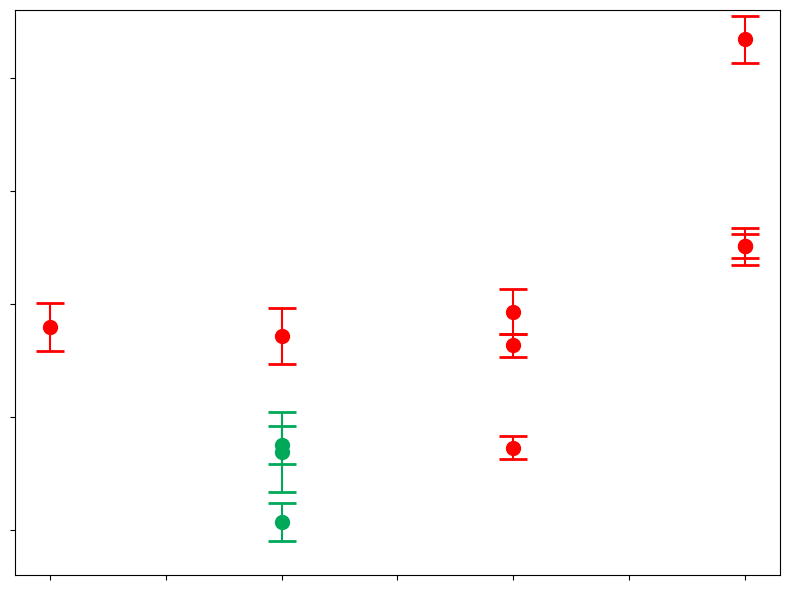

In [29]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'Electrostatics' # or 'Electrostatics' 'total energy', 'Solvation Polar'
group_col = 'functional'   # now using functional: True / False

font_size = 16
font_style = 'Arial'

x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics'
error_capsize = 10
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Color mapping by functional
colors = {True: '#00A859', False: 'red'}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter with error bars colored by functional
for func_value in [True, False]:
    sub_df = grouped_df_homo_reduced[grouped_df_homo_reduced[group_col] == func_value]
    plt.errorbar(
        sub_df[x_col], sub_df[y_col], yerr=sub_df[y_err],
        fmt='o', color=colors[func_value], ecolor=colors[func_value],
        capsize=error_capsize, capthick=2, markersize=10,
        label='Functional' if func_value else 'Non-functional'
    )

# Linear regression on all data
x_all = grouped_df_homo_reduced[x_col]
y_all = grouped_df_homo_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line (optional)
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
#plt.plot(x_fit, y_fit, color='darkgrey', linestyle='-', linewidth=1.5, label=label_fit)

# Add stats textbox
stats_text = f"$R^2$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"

ax = plt.gca()
ax.tick_params(labelbottom=False, labelleft=False)
plt.gca().invert_xaxis()
plt.ylim(-7, 18) # 8igy
#plt.ylim(-7, 16) #8xgd

plt.tight_layout()
plt.savefig(f"{pdb}_{y_label}_vs_ESI.svg", format="svg")

In [30]:
r_val, p_val

(np.float64(-0.6422021971880283), np.float64(0.03312566669731675))

### Homo samples ESI vs ∆phi Demo version

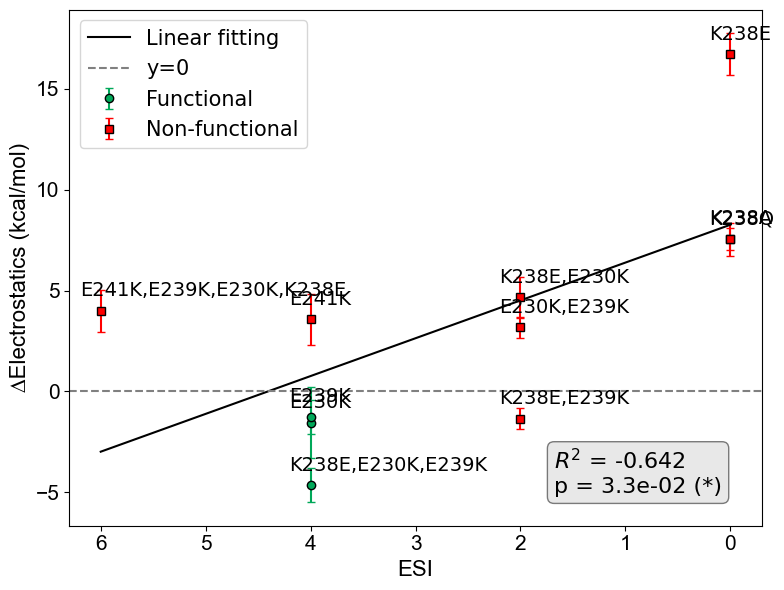

In [ ]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'Electrostatics' # or 'Electrostatics' 'total energy', 'Solvation Polar'
group_col = 'functional'   # now using functional: True / False

font_size = 16
font_style = 'Arial'
plot_title = f'{y_base} vs ESI'
x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics' + ' (kcal/mol)'
error_capsize = 3
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Colors by functional
colors = {True: '#00A859', False: 'red'}

# Marker settings for 'functional' True/False
marker_style = {
    True: {'marker': 'o', 'facecolors': colors[True], 'edgecolors': 'black', 'label': 'Functional'},
    False: {'marker': 'o', 'facecolors': colors[False], 'edgecolors': 'black', 'label': 'Non-functional'}
}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter plot with error bars
for functional_value in [True, False]:
    sub_df = grouped_df_homo_reduced[grouped_df_homo_reduced[group_col] == functional_value]
    x = sub_df[x_col]
    y = sub_df[y_col]
    y_std = sub_df[y_err]
    style = marker_style[functional_value]
    
    plt.errorbar(x, y, yerr=y_std, fmt=style['marker'], 
                 markerfacecolor=style['facecolors'], markeredgecolor=style['edgecolors'],
                 ecolor=style['facecolors'],
                 markersize=6, capsize=error_capsize, linestyle='none',
                 label=style['label'])
    # Add label text near each point
    for i, row in sub_df.iterrows():
        plt.text(row[x_col] + 0.2, row[y_col]+1, str(row['mut'].split(';')[0]),
                    fontsize=font_size-2, color=style['edgecolors'],
                    ha='left', va='center')

# Linear regression on all data
x_all = grouped_df_homo_reduced[x_col]
y_all = grouped_df_homo_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
plt.plot(x_fit, y_fit, color='black', linestyle='-', linewidth=1.5, label=label_fit)

# Add horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--', linewidth=1.5, label='y=0')

# Add stats textbox
stats_text = f"$R^2$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"
plt.text(0.7, 0.15, stats_text,
         transform=plt.gca().transAxes,
         fontsize=font_size,
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgrey', alpha=0.5))


# Axis formatting
plt.xlabel(x_label, fontsize=font_size, fontname=font_style)
plt.ylabel(y_label, fontsize=font_size, fontname=font_style)
plt.xticks(fontsize=font_size-1, fontname=font_style)
plt.yticks(fontsize=font_size-1, fontname=font_style)
plt.legend(fontsize=font_size-1)
plt.gca().invert_xaxis()

plt.tight_layout()

### ALl samples ESI vs ∆phi excluding E241K-related mutants Demo version

In [10]:
# drop mut that include 'E241K'  samples
grouped_df_reduced = grouped_df[~grouped_df['mut'].str.contains('E241K')]

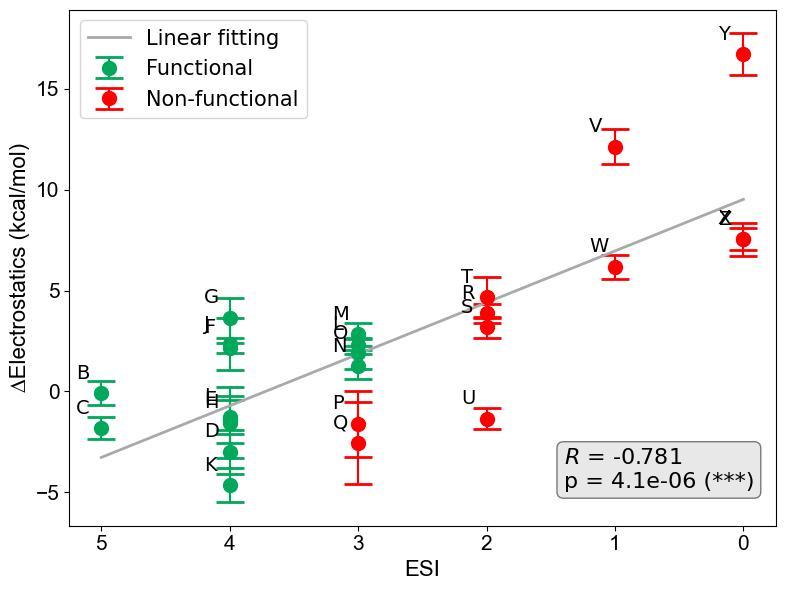

In [11]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'Electrostatics' # or 'Electrostatics' 'total energy', 'Solvation Polar'
group_col = 'functional'   # now using functional: True / False

font_size = 16
font_style = 'Arial'
plot_title = f'{y_base} vs ESI'
x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics' + ' (kcal/mol)'
error_capsize = 10
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Colors by functional
colors = {True: '#00A859', False: 'red'}

# Marker settings for 'functional' True/False
marker_style = {
    True: {'marker': 'o', 'facecolors': colors[True], 'edgecolors': 'black', 'label': 'Functional'},
    False: {'marker': 'o', 'facecolors': colors[False], 'edgecolors': 'black', 'label': 'Non-functional'}
}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter with error bars colored by functional
for func_value in [True, False]:
    sub_df = grouped_df_reduced[grouped_df_reduced[group_col] == func_value]
    plt.errorbar(
        sub_df[x_col], sub_df[y_col], yerr=sub_df[y_err],
        fmt='o', color=colors[func_value], ecolor=colors[func_value],
        capsize=error_capsize, capthick=2, markersize=10,
        label='Functional' if func_value else 'Non-functional'
    )
    # Add label text near each point
    for i, row in sub_df.iterrows():
        plt.text(row[x_col] + 0.2, row[y_col]+1, str(row['label']),
                    fontsize=font_size-2, color=marker_style[func_value]['edgecolors'],
                    ha='left', va='center')

# Linear regression on all data
x_all = grouped_df_reduced[x_col]
y_all = grouped_df_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
plt.plot(x_fit, y_fit, color='darkgrey', linestyle='-', linewidth=2, label=label_fit)

# Add stats textbox
stats_text = f"$R$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"
plt.text(0.7, 0.15, stats_text,
         transform=plt.gca().transAxes,
         fontsize=font_size,
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgrey', alpha=0.5))


# Axis formatting
plt.xlabel(x_label, fontsize=font_size, fontname=font_style)
plt.ylabel(y_label, fontsize=font_size, fontname=font_style)
plt.xticks(fontsize=font_size-1, fontname=font_style)
plt.yticks(fontsize=font_size-1, fontname=font_style)
plt.legend(fontsize=font_size-1)
plt.gca().invert_xaxis()

plt.tight_layout()

### ALl samples ESI vs ∆phi excluding E241K-related mutants

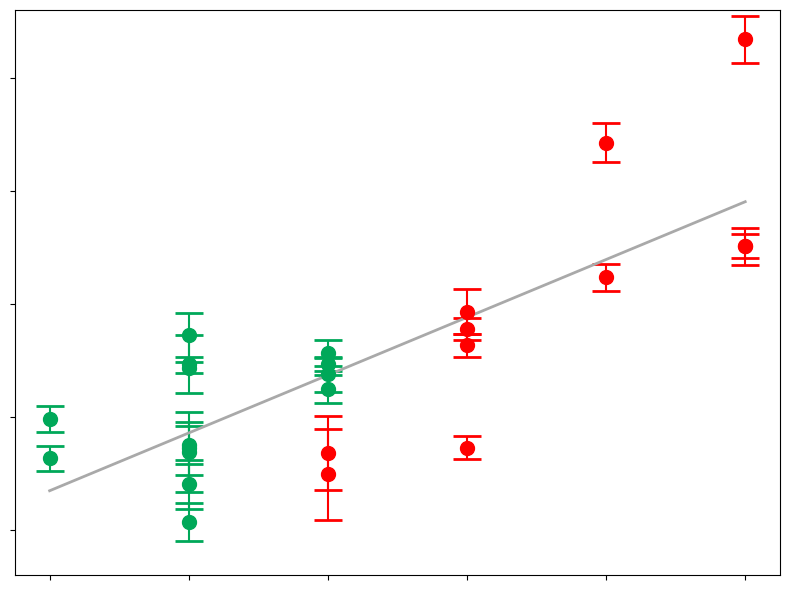

In [12]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'Electrostatics' # or 'Electrostatics' 'total energy', 'Solvation Polar'
group_col = 'functional'   # now using functional: True / False

font_size = 16
font_style = 'Arial'
plot_title = f'{y_base} vs ESI'
x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics'
error_capsize = 10
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Colors by functional
colors = {True: '#00A859', False: 'red'}

# Marker settings for 'functional' True/False
marker_style = {
    True: {'marker': 'o', 'facecolors': colors[True], 'edgecolors': 'black', 'label': 'Functional'},
    False: {'marker': 'o', 'facecolors': colors[False], 'edgecolors': 'black', 'label': 'Non-functional'}
}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter with error bars colored by functional
for func_value in [True, False]:
    sub_df = grouped_df_reduced[grouped_df_reduced[group_col] == func_value]
    plt.errorbar(
        sub_df[x_col], sub_df[y_col], yerr=sub_df[y_err],
        fmt='o', color=colors[func_value], ecolor=colors[func_value],
        capsize=error_capsize, capthick=2, markersize=10,
        label='Functional' if func_value else 'Non-functional'
    )

# Linear regression on all data
x_all = grouped_df_reduced[x_col]
y_all = grouped_df_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
plt.plot(x_fit, y_fit, color='darkgrey', linestyle='-', linewidth=2, label=label_fit)

# Add stats textbox
stats_text = f"$R^2$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"

# Axis formatting
ax = plt.gca()
ax.tick_params(labelbottom=False, labelleft=False)
plt.gca().invert_xaxis()
#plt.ylim(-7, 16) #8xgd
plt.ylim(-7, 18) #8iyg

plt.tight_layout()
plt.savefig(f"{pdb}_{y_label}_vs_ESI_homo_hetero.svg", format="svg")

### All samples ESI vs ∆∆G Demo version

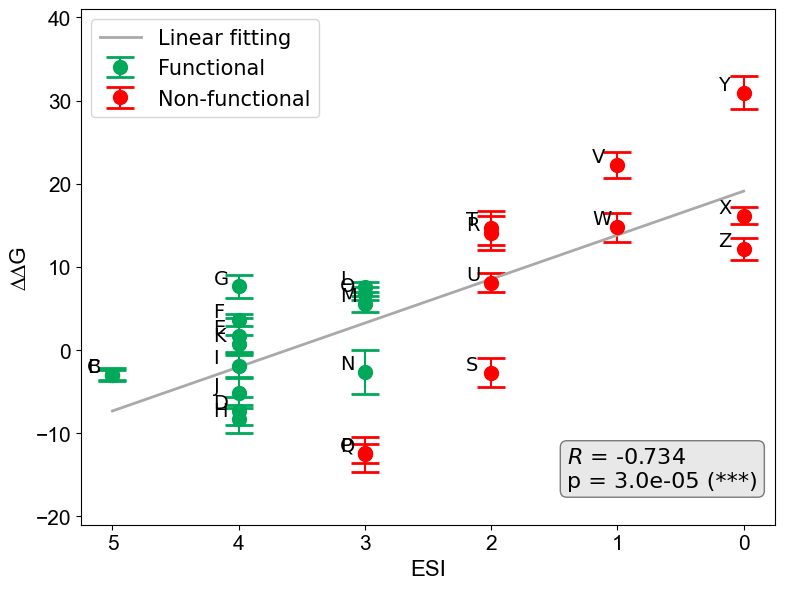

In [13]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'total energy'
group_col = 'functional'   # now using functional: True / False

font_size = 16
font_style = 'Arial'
plot_title = f'{y_base} vs ESI'
x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics' + ' (kcal/mol)'
error_capsize = 10
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Colors by functional
colors = {True: '#00A859', False: 'red'}

# Marker settings for 'functional' True/False
marker_style = {
    True: {'marker': 'o', 'facecolors': colors[True], 'edgecolors': 'black', 'label': 'Functional'},
    False: {'marker': 'o', 'facecolors': colors[False], 'edgecolors': 'black', 'label': 'Non-functional'}
}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter with error bars colored by functional
for func_value in [True, False]:
    sub_df = grouped_df_reduced[grouped_df_reduced[group_col] == func_value]
    plt.errorbar(
        sub_df[x_col], sub_df[y_col], yerr=sub_df[y_err],
        fmt='o', color=colors[func_value], ecolor=colors[func_value],
        capsize=error_capsize, capthick=2, markersize=10,
        label='Functional' if func_value else 'Non-functional'
    )
    # Add label text near each point
    for i, row in sub_df.iterrows():
        plt.text(row[x_col] + 0.2, row[y_col]+1, str(row['label']),
                    fontsize=font_size-2, color=marker_style[func_value]['edgecolors'],
                    ha='left', va='center')

# Linear regression on all data
x_all = grouped_df_reduced[x_col]
y_all = grouped_df_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
plt.plot(x_fit, y_fit, color='darkgrey', linestyle='-', linewidth=2, label=label_fit)

# Add stats textbox
stats_text = f"$R$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"
plt.text(0.7, 0.15, stats_text,
         transform=plt.gca().transAxes,
         fontsize=font_size,
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgrey', alpha=0.5))


# Axis formatting
plt.xlabel(x_label, fontsize=font_size, fontname=font_style)
plt.ylabel(y_label, fontsize=font_size, fontname=font_style)
plt.xticks(fontsize=font_size-1, fontname=font_style)
plt.yticks(fontsize=font_size-1, fontname=font_style)
plt.legend(fontsize=font_size-1)
plt.gca().invert_xaxis()
plt.ylim(-21, 41)
plt.tight_layout()

### All samples ESI vs ∆∆G

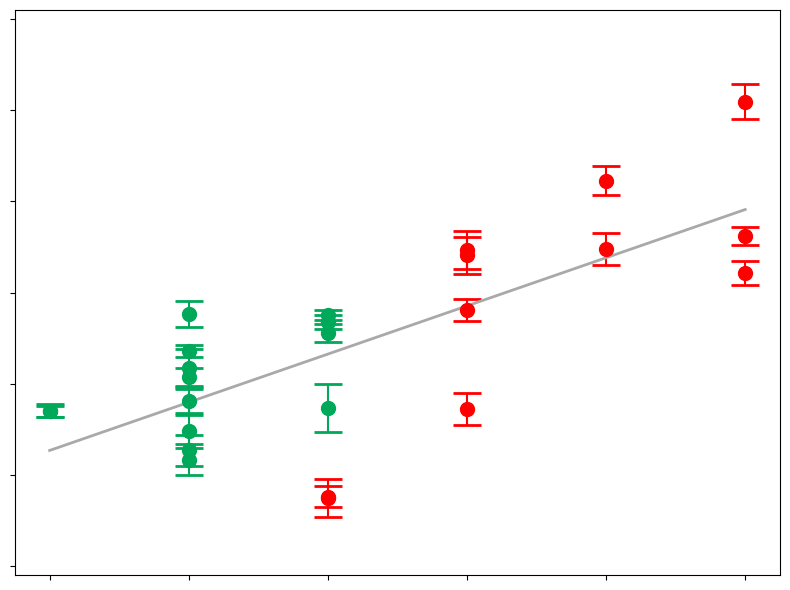

In [14]:
# ====== USER CONFIGURATION ======
x_col = 'ESI'              # x-axis
y_base = 'total energy'
group_col = 'functional'   # now using functional: True / False

font_style = 'Arial'
plot_title = f'{y_base} vs ESI'
x_label = 'ESI'
y_label = '∆∆G' if y_base == 'total energy' else '∆Electrostatics'
error_capsize = 10
# =================================

# Derived columns
y_col = f'{y_base}_mean'
y_err = f'{y_base}_std'

# Colors by functional
colors = {True: '#00A859', False: 'red'}

# Marker settings for 'functional' True/False
marker_style = {
    True: {'marker': 'o', 'facecolors': colors[True], 'edgecolors': 'black', 'label': 'Functional'},
    False: {'marker': 'o', 'facecolors': colors[False], 'edgecolors': 'black', 'label': 'Non-functional'}
}

# Plot setup
plt.figure(figsize=(8, 6))

# Scatter with error bars colored by functional
for func_value in [True, False]:
    sub_df = grouped_df_reduced[grouped_df_reduced[group_col] == func_value]
    plt.errorbar(
        sub_df[x_col], sub_df[y_col], yerr=sub_df[y_err],
        fmt='o', color=colors[func_value], ecolor=colors[func_value],
        capsize=error_capsize, capthick=2, markersize=10,
        label='Functional' if func_value else 'Non-functional'
    )

# Linear regression on all data
x_all = grouped_df_reduced[x_col]
y_all = grouped_df_reduced[y_col]
slope, intercept, r_val, p_val, _ = linregress(x_all, y_all)

# Plot the regression line
x_fit = pd.Series(sorted(x_all))
y_fit = slope * x_fit + intercept
label_fit = f"Linear fitting"
plt.plot(x_fit, y_fit, color='darkgrey', linestyle='-', linewidth=2, label=label_fit)

# Add stats textbox
stats_text = f"$R^2$ = {r_val:.3f}\np = {p_val:.1e} ({pval_to_stars(p_val)})"

# Axis formatting
ax = plt.gca()
ax.tick_params(labelbottom=False, labelleft=False)
plt.gca().invert_xaxis()
plt.ylim(-21, 41)

plt.tight_layout()
plt.savefig(f"{pdb}_{y_label}_vs_ESI.svg", format="svg")

# Hetero docking Cx36-Cx32

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Wild-type chart

In [2]:
file = 'Raw' #Average, Dif, Raw
all_diff_df = []

for pdb in ['8xgd', '8iyg']:
	for mut_sym in ['hetero', 'homo']:
		fdx_df = pd.read_csv(f'./{pdb}_{mut_sym}/{file}_{pdb}.fxout', sep='\t', skiprows=8)
		pdb_catg = [f.split('.')[0] for f in open(f'./{pdb}_{mut_sym}/PdbList_{pdb}.fxout')]
		# check if the length
		if len(fdx_df) != len(pdb_catg):
			print(f"Length mismatch for {pdb}_{mut_sym}: {len(fdx_df)} vs {len(pdb_catg)}")
		else:
			fdx_df['Pdb'] = pdb_catg
		#drop_cols
		drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
					'electrostatic kon', 'helix dipole', 'Sidechain Hbond']
		fdx_df = fdx_df.drop(drop_cols, axis=1)
		drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
		fdx_df = fdx_df.drop(drop_cols, axis=1)
		fdx_df['Pdb'] = pdb_catg
		all_diff_df.append(fdx_df)
fdx_df = pd.read_csv(f'./cx36_32_dock/{file}_cx36_32.fxout', sep='\t', skiprows=8)
pdb_catg = [f.split('.')[0] for f in open(f'./cx36_32_dock/PdbList_cx36_32.fxout')]
#drop_cols
drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
			'electrostatic kon', 'helix dipole', 'Sidechain Hbond']
fdx_df = fdx_df.drop(drop_cols, axis=1)
drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
fdx_df = fdx_df.drop(drop_cols, axis=1)
fdx_df['Pdb'] = pdb_catg
all_diff_df.append(fdx_df)
all_diff_df = pd.concat(all_diff_df, ignore_index=True)

In [3]:
all_diff_df = all_diff_df[all_diff_df['Pdb'].str.contains('WT_')]
all_diff_df

,Pdb,total energy,Backbone Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,entropy sidechain,entropy mainchain,energy Ionisation
10,WT_8xgd_1_0,991.270,-1412.18,-2275.02,-93.3640,3306.71,-2864.04,1161.76,3307.50,3.43792
11,WT_8xgd_1_1,999.249,-1410.16,-2273.14,-89.4869,3303.74,-2861.84,1158.81,3306.80,3.43792
12,WT_8xgd_1_2,993.239,-1411.50,-2273.00,-91.1529,3303.27,-2861.59,1159.68,3306.24,3.43792
13,WT_8xgd_1_3,1001.660,-1410.23,-2275.04,-89.0500,3308.07,-2863.77,1159.49,3307.04,3.43792
14,WT_8xgd_1_4,997.390,-1410.51,-2274.30,-90.1947,3304.57,-2863.23,1158.68,3308.03,3.43792
...,...,...,...,...,...,...,...,...,...,...
1075,WT_cx36_32_4_0,564.744,-1380.38,-2581.94,-153.6000,3584.82,-3317.52,1234.06,3486.94,5.03599
1076,WT_cx36_32_4_1,566.624,-1379.19,-2582.30,-154.5360,3585.82,-3317.90,1233.53,3486.22,5.03599
1077,WT_cx36_32_4_2,569.271,-1379.19,-2582.10,-153.6050,3585.65,-3317.75,1232.81,3486.19,5.03599
1078,WT_cx36_32_4_3,567.026,-1379.07,-2582.76,-153.7860,3586.89,-3318.38,1233.97,3486.33,5.03599


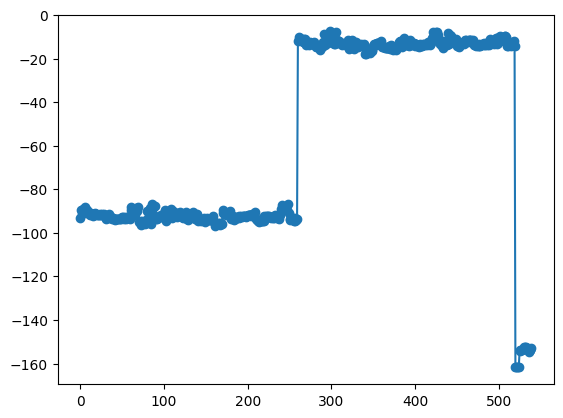

In [5]:
plt.plot([i for i in range(len(all_diff_df))], all_diff_df['Electrostatics'], marker='o')

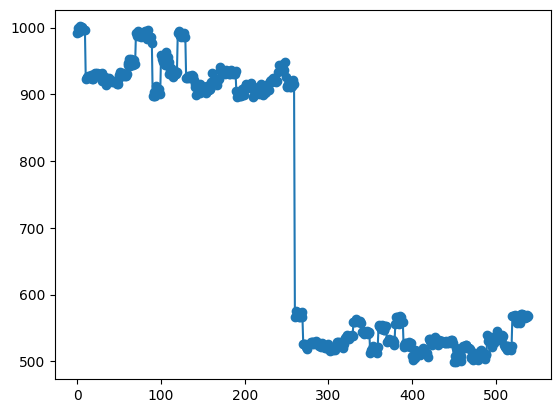

In [7]:
plt.plot([i for i in range(len(all_diff_df))], all_diff_df['total energy'], marker='o')

## hetero-docking variants

In [9]:
file = 'Dif' #Average, Dif, Raw
all_diff_df = []

fdx_df = pd.read_csv(f'./cx36_32_dock/{file}_cx36_32.fxout', sep='\t', skiprows=8)
#drop_cols
drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
			'electrostatic kon', 'helix dipole', 'Sidechain Hbond']
fdx_df = fdx_df.drop(drop_cols, axis=1)
drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
fdx_df = fdx_df.drop(drop_cols, axis=1)

In [10]:
fdx_df

,Pdb,total energy,Backbone Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,entropy sidechain,entropy mainchain
0,cx36_32_1_0.pdb,-0.257472,2.861620,-0.565589,-5.003280,-2.478620,-4.045600,-2.107350,3.029980
1,cx36_32_1_1.pdb,0.087325,2.944240,-0.590603,-4.990850,-3.000400,-4.322060,-3.031260,2.993570
2,cx36_32_1_2.pdb,0.568722,3.439820,-0.706362,-5.153770,-2.155490,-4.373600,-3.386590,3.458580
3,cx36_32_1_3.pdb,0.210044,2.650920,-1.027540,-5.288870,-1.631640,-4.690600,-3.146000,3.053720
4,cx36_32_1_4.pdb,1.042020,2.879160,-1.374840,-5.658270,-1.109790,-5.302920,-1.045690,3.494210
5,cx36_32_2_0.pdb,2.442010,5.164190,0.332638,-3.865970,-6.546230,-3.668160,-5.554580,3.043380
6,cx36_32_2_1.pdb,1.691210,2.620990,-0.847664,-4.875140,-2.266170,-4.812980,-2.232040,4.187600
7,cx36_32_2_2.pdb,0.997124,3.092080,0.656650,-4.592750,-5.940380,-3.199020,-3.583200,3.861800
8,cx36_32_2_3.pdb,1.496780,3.662330,-0.235822,-3.281330,-4.902430,-4.381250,-1.873400,3.541620
9,cx36_32_2_4.pdb,2.187040,3.529320,-0.485008,-4.258330,-3.156870,-4.415230,-1.197750,3.303250


## Binding free energy computation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file = 'Raw' #Average, Dif, Raw
all_diff_df = []
'''
pdb = '8xgd'
# load 8xgd wild type results
for mut_sym in ['hetero', 'homo']:
	fdx_df = pd.read_csv(f'./{pdb}_{mut_sym}/{file}_{pdb}.fxout', sep='\t', skiprows=8)
	pdb_catg = ['_'.join(f.split('_')[:-2]) for f in open(f'./{pdb}_{mut_sym}/PdbList_{pdb}.fxout')]
	# check if the length
	if len(fdx_df) != len(pdb_catg):
		print(f"Length mismatch for {pdb}_{mut_sym}: {len(fdx_df)} vs {len(pdb_catg)}")
	else:
		fdx_df['Pdb'] = pdb_catg
	#drop_cols
	drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
				'electrostatic kon', 'helix dipole', 'Sidechain Hbond']
	fdx_df = fdx_df.drop(drop_cols, axis=1)
	drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
	fdx_df = fdx_df.drop(drop_cols, axis=1)
	fdx_df['Pdb'] = pdb_catg
	all_diff_df.append(fdx_df[fdx_df['Pdb'].str.contains('WT_')])
'''

# load cx36_32,  8xgd_all, 8xgd_half, 7zxm_half esults
for f_n in ['cx36_32',  '8xgd_all', '8xgd_half', '7zxm_half']:
	fdx_df = pd.read_csv(f'./{f_n}/{file}_{f_n}.fxout', sep='\t', skiprows=8)
	pdb_catg = ['_'.join(f.split('_')[:-2]) for f in open(f'./{f_n}/PdbList_{f_n}.fxout')]
	#drop_cols
	drop_cols = ['Van der Waals clashes', 'cis_bond', 'torsional clash', 'backbone clash', 'disulfide',
				'electrostatic kon', 'helix dipole', 'Sidechain Hbond']
	fdx_df = fdx_df.drop(drop_cols, axis=1)
	drop_cols = fdx_df.columns[~(fdx_df  != 0).all()]
	fdx_df = fdx_df.drop(drop_cols, axis=1)
	fdx_df['Pdb'] = pdb_catg
	all_diff_df.append(fdx_df[fdx_df['Pdb'].str.contains('WT_')])
all_diff_df = pd.concat(all_diff_df, ignore_index=True)

In [8]:
all_diff_df

,Pdb,total energy,Backbone Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,entropy sidechain,entropy mainchain,energy Ionisation
0,WT_cx36_32,568.0020,-1387.020,-2586.18,-161.7910,3603.53,-3320.36,1247.240,3491.03,5.03599
1,WT_cx36_32,567.4280,-1386.460,-2586.52,-161.7820,3604.20,-3320.73,1247.750,3490.93,5.03599
2,WT_cx36_32,568.1890,-1387.020,-2585.95,-161.5050,3603.01,-3319.97,1247.350,3490.91,5.03599
3,WT_cx36_32,568.7260,-1386.250,-2585.97,-161.6040,3603.43,-3320.13,1247.390,3490.87,5.03599
4,WT_cx36_32,567.2320,-1386.380,-2586.10,-161.8200,3603.37,-3320.20,1247.490,3490.80,5.03599
5,WT_cx36_32,557.5430,-1382.980,-2580.88,-154.2810,3582.51,-3316.38,1236.290,3486.73,5.03599
6,WT_cx36_32,558.8710,-1381.790,-2580.11,-153.9570,3580.66,-3315.39,1235.540,3486.31,5.03599
7,WT_cx36_32,559.0120,-1382.400,-2581.01,-153.5810,3581.95,-3316.67,1235.930,3486.65,5.03599
8,WT_cx36_32,559.1340,-1382.160,-2580.70,-153.8220,3581.49,-3316.27,1234.150,3486.22,5.03599
9,WT_cx36_32,557.6680,-1382.000,-2579.85,-153.3460,3579.57,-3315.26,1234.020,3486.42,5.03599


In [9]:
all_diff_df['Pdb'].unique()

array(['WT_cx36_32', 'WT_8xgd', 'WT_8xgd_half', 'WT_7zxm_half'],
      dtype=object)

In [10]:
# Compute mean of all numeric columns grouped by Pdb
mean_by_pdb = all_diff_df.groupby('Pdb').mean()
mean_by_pdb

,total energy,Backbone Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,entropy sidechain,entropy mainchain,energy Ionisation
Pdb,,,,,,,,,
WT_7zxm_half,-64.92229,-887.3026,-1198.7890,-53.43750,1642.0400,-1528.972,531.1794,1540.543,1.96293
WT_8xgd,982.10600,-1413.6630,-2275.8620,-96.06677,3302.4300,-2866.766,1165.7200,3311.490,3.43792
WT_8xgd_half,473.96820,-705.9578,-1111.1650,-43.95328,1600.3650,-1401.147,563.3269,1646.473,1.71880
WT_cx36_32,565.86750,-1382.0440,-2582.3405,-155.46445,3588.2745,-3317.330,1237.0620,3487.474,5.03599


In [15]:
energy_col = 'total energy' # or 'total energy'
ddg_cx36 = 2*mean_by_pdb.loc['WT_8xgd_half', energy_col] - mean_by_pdb.loc['WT_8xgd', energy_col]
ddg_cx36_32 = mean_by_pdb.loc['WT_8xgd_half', energy_col] + mean_by_pdb.loc['WT_7zxm_half', energy_col] - mean_by_pdb.loc['WT_cx36_32', energy_col]
print("Cx36 binding ∆∆G:", ddg_cx36)
print("Cx36_32 binding ∆∆G:", ddg_cx36_32)

Cx36 binding ∆∆G: -34.16960000000006
Cx36_32 binding ∆∆G: -156.82159000000013


In [16]:
energy_col = 'Electrostatics' # or 'total energy'
ddg_cx36 = 2*mean_by_pdb.loc['WT_8xgd_half', energy_col] - mean_by_pdb.loc['WT_8xgd', energy_col]
ddg_cx36_32 = mean_by_pdb.loc['WT_8xgd_half', energy_col] + mean_by_pdb.loc['WT_7zxm_half', energy_col] - mean_by_pdb.loc['WT_cx36_32', energy_col]
print("Cx36 binding ∆∆phi:", ddg_cx36)
print("Cx36_32 binding ∆∆phi:", ddg_cx36_32)

Cx36 binding ∆∆phi: 8.160209999999992
Cx36_32 binding ∆∆phi: 58.07366999999999
